In [2]:
from google.colab import files
files.upload()   # upload kaggle.json again


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"sprathikk","key":"2a3aeb77aea72a365a710fdfbf132904"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d techsash/waste-classification-data


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
waste-classification-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile

with zipfile.ZipFile("waste-classification-data.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/waste-classification-data")


In [6]:
!find /content/waste-classification-data -type d


/content/waste-classification-data
/content/waste-classification-data/dataset
/content/waste-classification-data/dataset/DATASET
/content/waste-classification-data/dataset/DATASET/TRAIN
/content/waste-classification-data/dataset/DATASET/TRAIN/R
/content/waste-classification-data/dataset/DATASET/TRAIN/O
/content/waste-classification-data/dataset/DATASET/TEST
/content/waste-classification-data/dataset/DATASET/TEST/R
/content/waste-classification-data/dataset/DATASET/TEST/O
/content/waste-classification-data/DATASET
/content/waste-classification-data/DATASET/TRAIN
/content/waste-classification-data/DATASET/TRAIN/R
/content/waste-classification-data/DATASET/TRAIN/O
/content/waste-classification-data/DATASET/TEST
/content/waste-classification-data/DATASET/TEST/R
/content/waste-classification-data/DATASET/TEST/O


In [7]:
import os

train_dir = "/content/waste-classification-data/dataset/DATASET/TRAIN"
test_dir = "/content/waste-classification-data/dataset/DATASET/TEST"

print("Train Folder Exists:", os.path.exists(train_dir))
print("Test Folder Exists:", os.path.exists(test_dir))


Train Folder Exists: True
Test Folder Exists: True


In [8]:
train_dir = "/content/waste-classification-data/DATASET/TRAIN"


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(2, activation='softmax')   # 2 classes → Organic, Recyclable
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
565/565 ━━━━━━━━━━━━━━━━━━━━ 520s 916ms/step - accuracy: 0.7760 - loss: 0.5870 - val_accuracy: 0.7855 - val_loss: 0.4219
Epoch 2/5
565/565 ━━━━━━━━━━━━━━━━━━━━ 524s 927ms/step - accuracy: 0.8406 - loss: 0.3848 - val_accuracy: 0.8092 - val_loss: 0.3942
Epoch 3/5
565/565 ━━━━━━━━━━━━━━━━━━━━ 518s 916ms/step - accuracy: 0.8564 - loss: 0.3453 - val_accuracy: 0.8291 - val_loss: 0.3903
Epoch 4/5
565/565 ━━━━━━━━━━━━━━━━━━━━ 519s 918ms/step - accuracy: 0.8726 - loss: 0.3124 - val_accuracy: 0.7901 - val_loss: 0.4845
Epoch 5/5
565/565 ━━━━━━━━━━━━━━━━━━━━ 510s 903ms/step - accuracy: 0.8877 - loss: 0.2794 - val_accuracy: 0.8245 - val_loss: 0.4020


In [12]:
model.save("/content/waste_cnn_model.h5")
print("Model saved successfully!")


Model saved successfully!


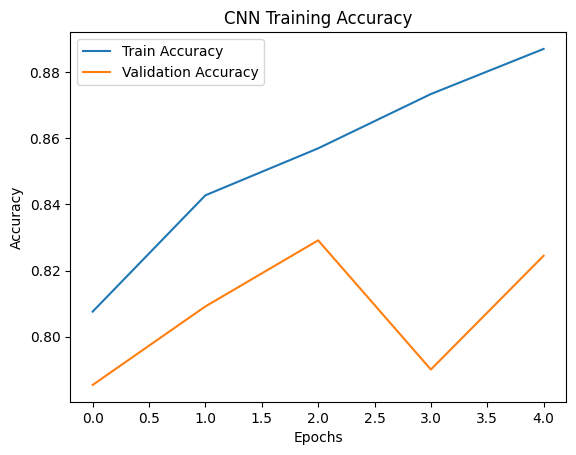

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN Training Accuracy")

plt.savefig("/content/accuracy_plot.png")
plt.show()


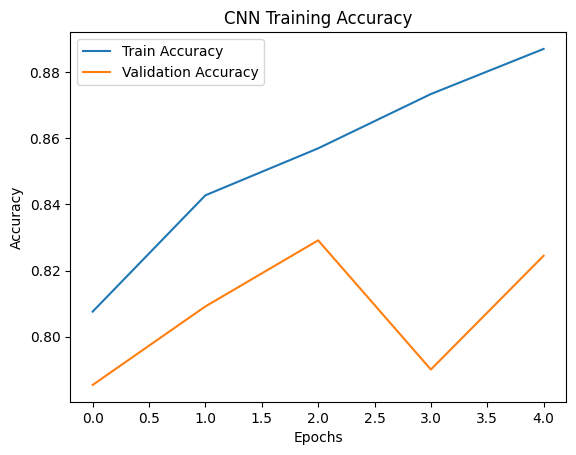

Plot saved as accuracy_plot.png


In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Training Accuracy")

plt.savefig("/content/accuracy_plot.png")
plt.show()

print("Plot saved as accuracy_plot.png")


In [16]:
from google.colab import files
files.download('/content/waste_cnn_model.h5')
files.download('/content/accuracy_plot.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
!pip install tensorflow


In [18]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [19]:
from google.colab import files
uploaded = files.upload()


Saving accuracy_plot(1).png to accuracy_plot(1) (1).png
Saving waste_cnn_model.h5 to waste_cnn_model (2).h5


In [25]:
from google.colab import files
uploaded = files.upload()


Saving app2.py to app2 (1).py


In [ ]:
# import streamlit as st
# import numpy as np
# from PIL import Image
# import tensorflow as tf

# # ----------------------------------------------------
# # PAGE CONFIG
# # ----------------------------------------------------
# st.set_page_config(page_title="Smart Waste Classifier", layout="centered")

# custom_css = """
# <style>

# html, body, [class*="css"]  {
#     font-family: 'Segoe UI', sans-serif;
# }

# /* Remove Streamlit default top padding */
# .main > div {
#     padding-top: 0rem !important;
# }

# /* Remove file uploader WHITE TEXT BAR */
# .css-9oya0r, .e1y61itm0, .stFileUploader label div:nth-child(2) {
#     display: none !important;
# }

# /* Center title */
# .title-style {
#     text-align: center;
#     font-size: 40px;
#     color: #32CD32;
#     font-weight: 700;
#     margin-top: 10px;
# }

# /* Subtitle */
# .subtitle-style {
#     text-align: center;
#     font-size: 18px;
#     color: #cccccc;
#     margin-bottom: 25px;
# }

# /* Result box */
# .result-box {
#     padding: 18px;
#     border-radius: 12px;
#     font-size: 22px;
#     font-weight: 600;
#     text-align: center;
# }

# /* Success (Recyclable) */
# .recyclable {
#     background-color: rgba(0, 255, 150, 0.15);
#     color: #00ff9a;
#     border: 1px solid #00ff9a;
# }

# /* Organic (Error) */
# .organic {
#     background-color: rgba(255, 80, 80, 0.15);
#     color: #ff6b6b;
#     border: 1px solid #ff6b6b;
# }

# </style>
# """

# st.markdown(custom_css, unsafe_allow_html=True)

# # ----------------------------------------------------
# # LOAD MODEL
# # ----------------------------------------------------
# @st.cache_resource
# def load_waste_model():
#     return tf.keras.models.load_model("waste_cnn_model.h5")

# model = load_waste_model()

# # ----------------------------------------------------
# # HEADER
# # ----------------------------------------------------
# st.markdown("<h1 class='title-style'>♻ Smart Waste Classification App</h1>", unsafe_allow_html=True)
# st.markdown("<p class='subtitle-style'>Upload your waste image this app classifies waste as **Organic** or **Recyclable** using a CNN model.</p>", unsafe_allow_html=True)

# # ----------------------------------------------------
# # SIDEBAR
# # ----------------------------------------------------
# st.sidebar.header("📈 Model Information")

# try:
#     st.sidebar.image("accuracy_plot.png", caption="Training Accuracy", use_container_width=True)
# except:
#     st.sidebar.info("Upload accuracy_plot.png to display training graph.")

# # ----------------------------------------------------
# # FILE UPLOADER
# # ----------------------------------------------------
# uploaded_file = st.file_uploader("Upload Waste Image", type=["png", "jpg", "jpeg"])

# if uploaded_file is not None:
#     st.image(uploaded_file, caption="Uploaded Image", width=280)

#     img = Image.open(uploaded_file).convert("RGB")
#     img = img.resize((128, 128))

#     img_array = np.array(img) / 255.0
#     img_batch = np.expand_dims(img_array, axis=0)

#     with st.spinner("Classifying..."):
#         prediction = float(model.predict(img_batch)[0][0])

#     st.subheader("Result:")

#     if prediction > 0.5:
#         result_html = "<div class='result-box recyclable'>🍃 Organic Waste</div>"
#     else:
#         result_html = "<div class='result-box organic'>♻ Recyclable Waste</div>"

#     st.markdown(result_html, unsafe_allow_html=True)

#     st.write(f"**Model Confidence:** `{prediction:.4f}`")

# else:
#     st.info("Please upload an image to begin.")


In [26]:
!pip install streamlit
!pip install pyngrok

In [39]:
from pyngrok import ngrok
ngrok.set_auth_token("35hfQBBBRcatZ6vVgLfDrpAdMR0_5aRKRdYKFbhhRQE4oMa2t")


In [43]:
!streamlit run app2.py --server.port 8501 --server.address 0.0.0.0 &>/tmp/logs.txt &
public_url = ngrok.connect(8501)
public_url
#Open the http link to access

<NgrokTunnel: "https://nonjudgmentally-nondomesticated-fredric.ngrok-free.dev" -> "http://localhost:8501">

In [44]:
!pkill ngrok


In [45]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://nonjudgmentally-nondomesticated-fredric.ngrok-free.dev" -> "http://localhost:8501">